**LGMVIP-Data Science**

**Task 5: Prediction using Decision Tree Algorithm**

__-by Omkar Jalgaonkar__

**Importing the required python libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import sklearn.datasets as datasets

**Loading the dataset**

In [4]:
iris_set=datasets.load_iris()
iris=pd.DataFrame(iris_set.data,columns=iris_set.feature_names)
iris["species"]=iris_set.target
iris.rename(columns={"sepal length (cm)":"SepalLengthCm", "sepal width (cm)":"SepalWidthCm", "petal length (cm)":"PetalLengthCm", "petal width (cm)":"PetalWidthCm" },inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'species'],
      dtype='object')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
#To find the no. of flowers present in each species

iris["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [10]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
SepalLengthCm,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidthCm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLengthCm,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidthCm,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


# Data Visualisation

**Scatter Plot:**

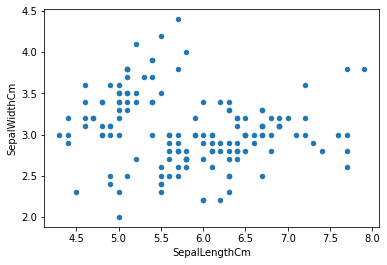

In [12]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm' )
plt.show()

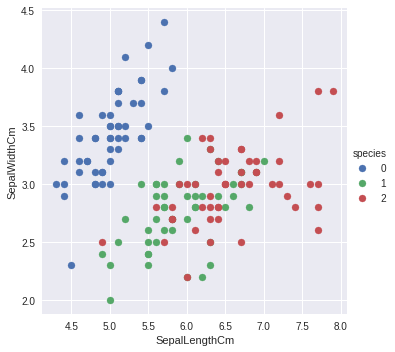

In [13]:
plt.style.use('seaborn')
sns.FacetGrid(iris,hue='species',height=5).\
            map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
            .add_legend()

**Here, we can observe that we can differentiate Setosa flowers from other type of flowers.**

**Whereas, Versicolor and Vergina are overlapping with each other.**

**Pair Plot:**

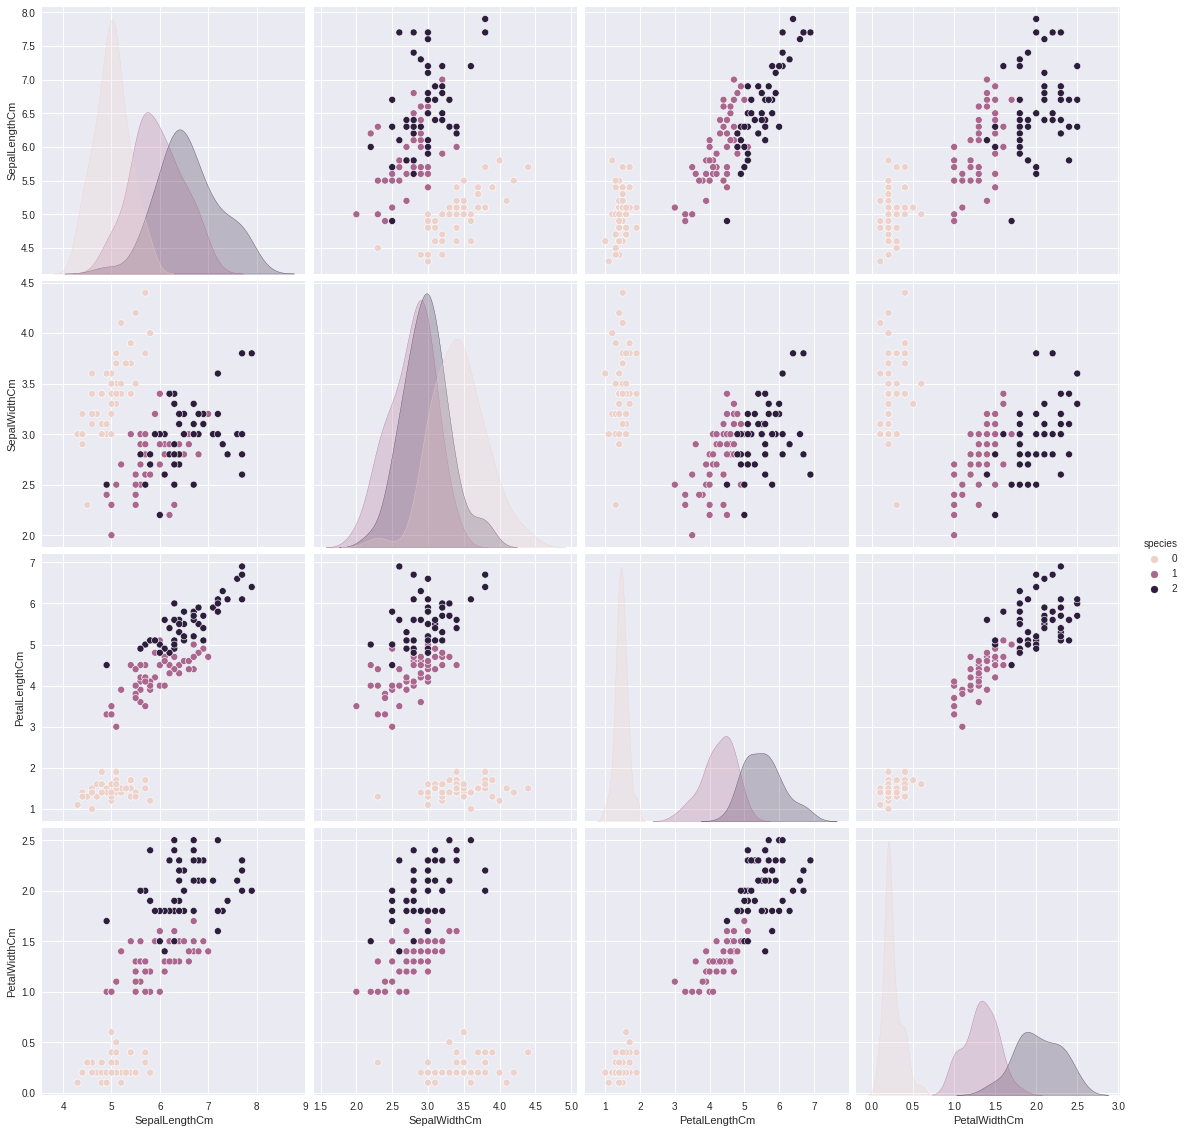

In [14]:
sns.pairplot(iris,hue="species", height=4)

**Box Plot:**

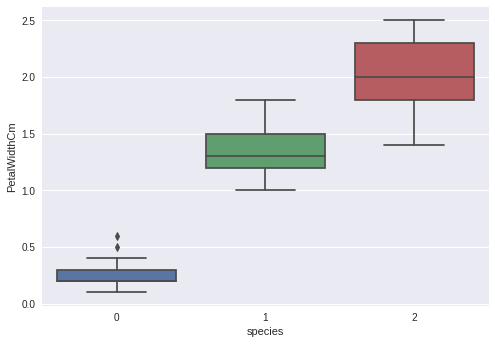

In [15]:
sns.boxplot(x="species", y="PetalWidthCm", data=iris)

**Violin Plot:**

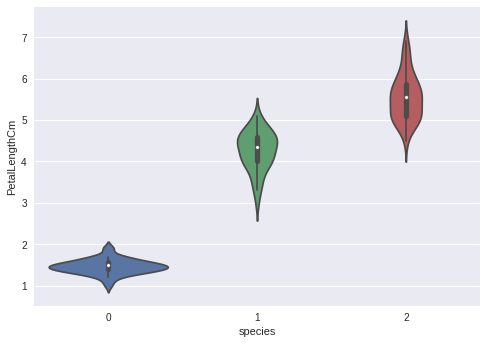

In [16]:
sns.violinplot(x='species', y='PetalLengthCm', data=iris)

**Heatmap:**

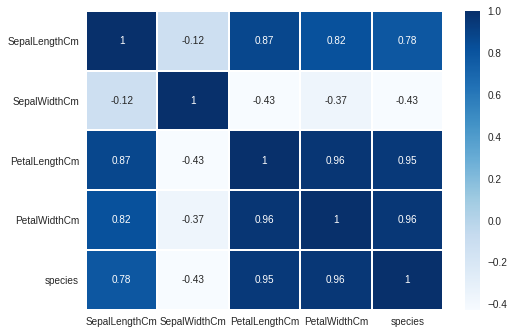

In [17]:
sns.heatmap(iris.corr(),cmap='Blues',annot=True,linewidths=1)
plt.show()

In [18]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=iris['species']

**Training and Testing Data**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Machine Learning Models

**Support Vector Machine**

In [21]:
from sklearn import svm
model=svm.SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


**Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=16)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [24]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.9666666666666667


In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


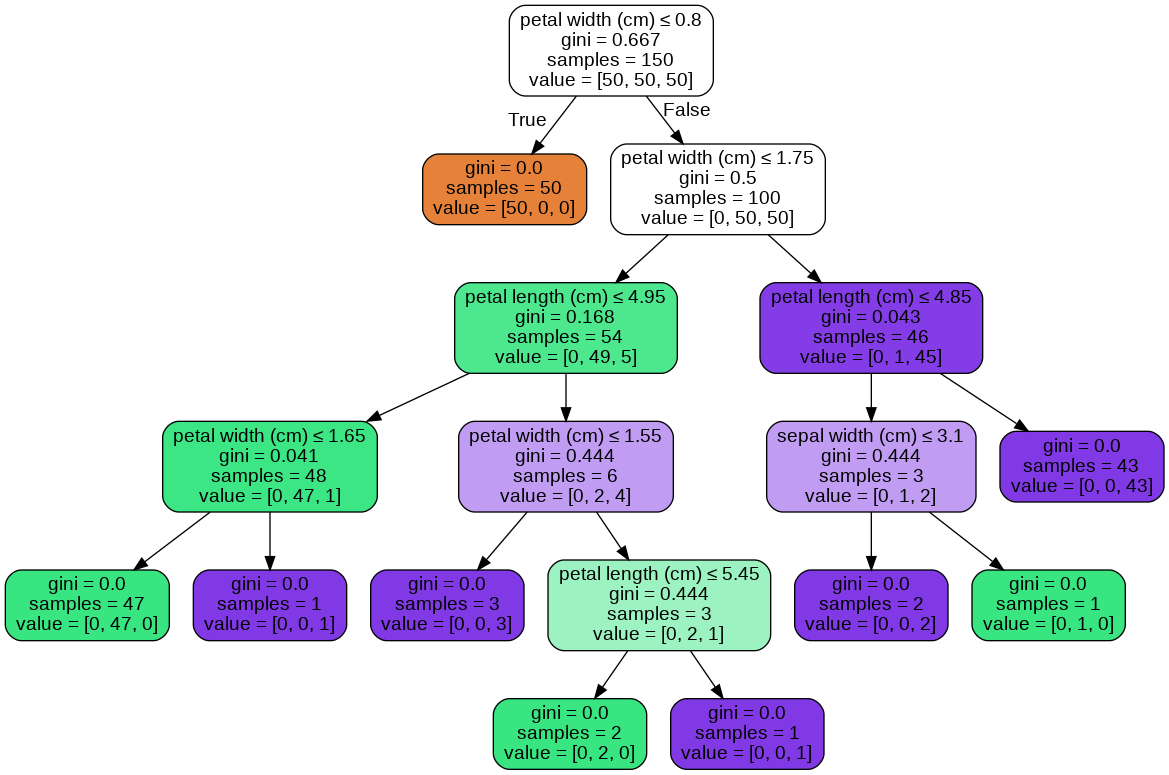

In [27]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())